In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pywt
import matplotlib.dates as mdates
import cmocean as cm

In [26]:
cd ..

C:\Users\216606\Documents\workspace\pcce-wavelets


In [78]:
from src.butter_filter import butter_filter
from src.scaleogram.lib import scaleogram as scg

In [79]:
plt.rcParams['font.size'] = 12
plt.rcParams["pcolor.shading"] = 'flat'

### functions

In [80]:
def create_white_noise(n: int, period:float, amp: float, phase=None):
    from numpy import cos, pi
    """
    n: vecor length
    period: time
    amp: signal amplitude
    phase(optional): displacement of the wave with respect to the origin 
    """
    if phase:
        wave =[amp * cos((i*pi)/period + phase) for i in range(n)]
        wave = np.array(wave)
        return wave
    else:
        wave =[amp * cos((i*pi)/period) for i in range(n)]
        wave = np.array(wave)
        return wave

In [81]:
def add_noise(x:pd.Series, noise:np.asarray)->np.asarray:
    x_no_nan = x.copy()
    nan_idx = x_no_nan.isna()
    x_no_nan.loc[nan_idx] = 0
    
    r = x_no_nan + noise
    r = np.array(x_no_nan)
    return r

### reading data

In [82]:
ul = pd.read_csv('data/boia/ul-boia-completo.csv', delimiter=';')
vl = pd.read_csv('data/boia/vl-boia-completo.csv', delimiter=';')

In [83]:
who

T_wave	 add_noise	 ax	 butter_filter	 cm	 coefficients	 col	 create_white_noise	 date_fmt	 
depth	 fig	 frequencies	 im	 mdates	 noise1	 noise2	 np	 pd	 
plt	 pywt	 r	 scales	 scg	 time1	 time2	 ul	 vl	 
wavelet	 


In [84]:
ul.shape

(7016, 21)

In [85]:
ul.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,time
0,-5.928774,-2.978601,-3.320634,-3.470345,-2.958156,-4.705866,-4.566947,-4.462758,-4.844342,-4.948923e+00,...,-5.173874,-5.409318,-5.760821,-6.081331,-6.413693,-5.555062,-8.241056,-10.291037,-11.737973,2016-11-18 20:00:00
1,-11.402727,-8.750596,-6.980657,-8.503150,-7.380865,-6.373020,-6.549218,-7.249262,-5.218583,-6.987684e+00,...,-7.513953,-8.413696,-6.891079,-5.694019,-7.456039,-4.235960,-3.785530,4.594848,16.173534,2016-11-18 21:00:00
2,0.595127,-0.638758,-1.915496,-1.245912,-1.789890,-0.588146,0.605599,-1.165643,-1.095844,3.552714e-15,...,0.000000,1.777977,0.326360,0.715440,4.220607,3.949746,5.871076,7.969069,22.089146,2016-11-18 22:00:00
3,0.614325,-0.577675,-1.165643,0.553241,1.549144,2.510085,4.723230,5.376330,2.644565,2.894800e+00,...,3.299315,3.763202,4.199816,4.199816,5.430056,6.582062,10.565457,13.700013,17.279061,2016-11-18 23:00:00
4,4.704157,4.643222,5.913223,6.869124,5.819362,7.021771,9.120455,9.757562,9.385132,1.041818e+01,...,9.850180,10.301681,11.924578,12.065419,16.133969,15.607146,17.665048,21.372640,26.119881,2016-11-19 00:00:00


In [86]:
# Datas
time1 = mdates.datestr2num(ul.time.iloc[0:3500])
time2 = mdates.datestr2num(ul.time.iloc[5500:])

In [87]:
# Ruidos
noise1 = create_white_noise(n=len(time1), period=1_000, amp=0.001, phase=0.25*np.pi)
noise2 = create_white_noise(n=len(time2), period=1_000, amp=0.01, phase=0)

In [ ]:
vl = pd.read_csv('../data/boia/vl-boia-completo.csv', delimiter=';')

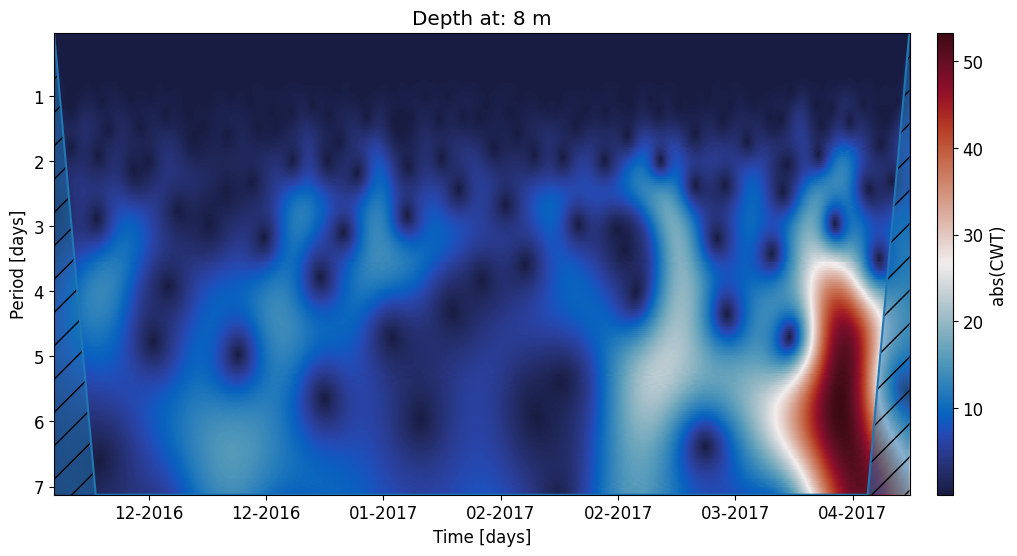

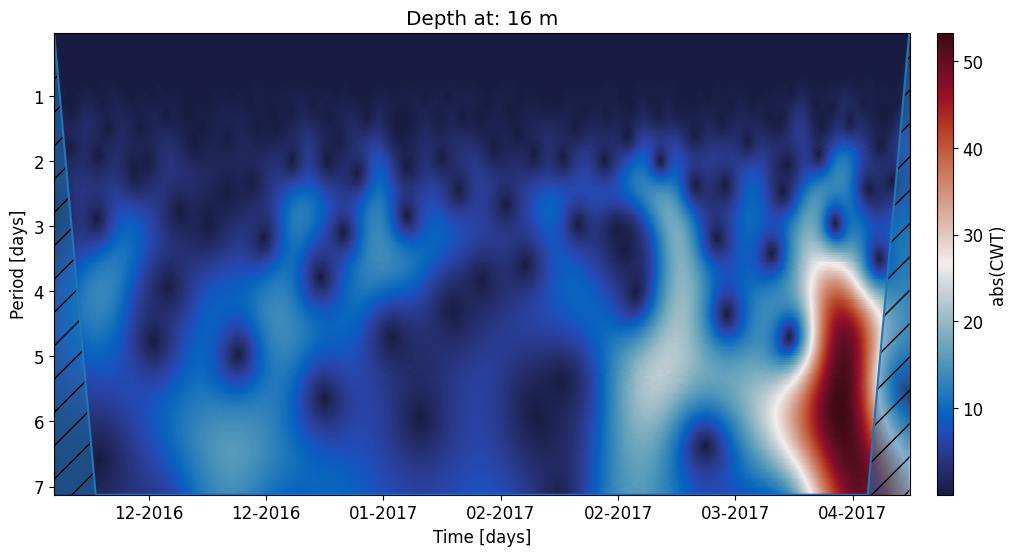

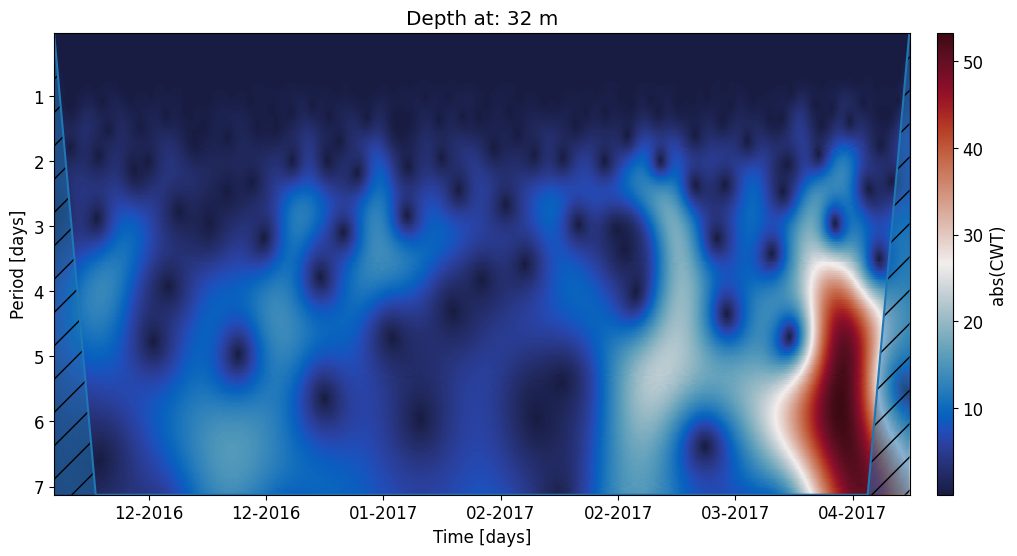

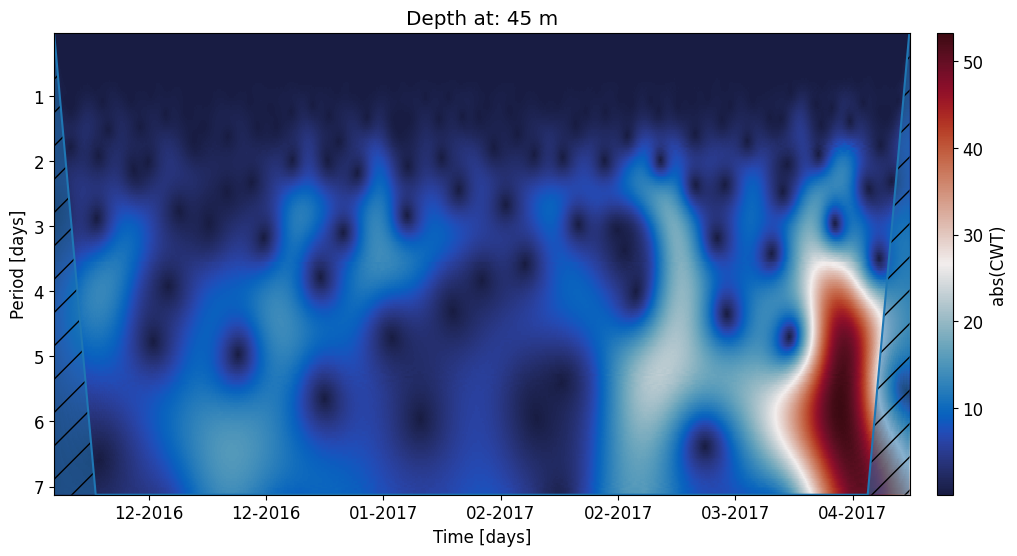

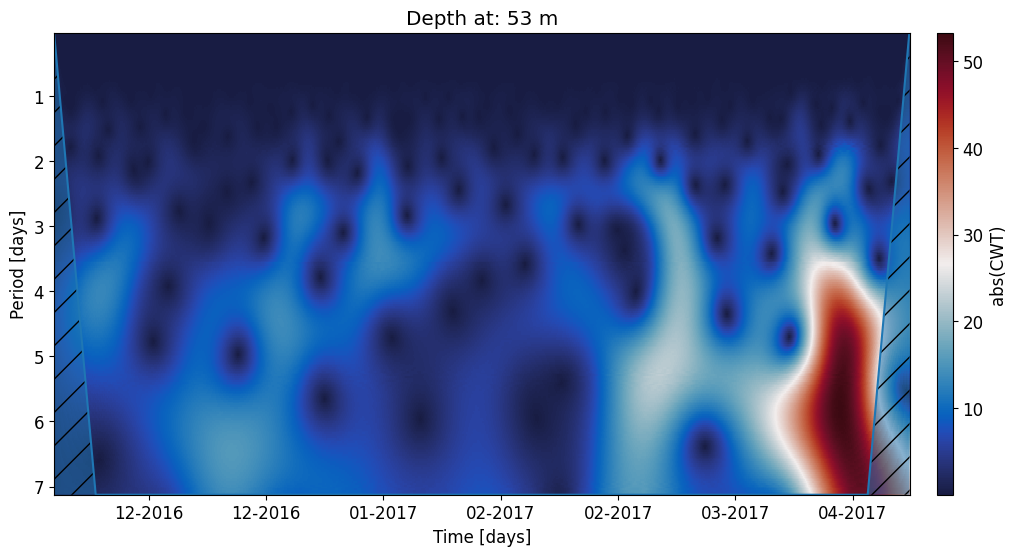

In [178]:
date_fmt = mdates.DateFormatter('%m-%Y')
#for col, depth in zip([1, 4, 10, 16, 19],['8','16','32','45','53']):

    r = add_noise(ul.iloc[:3500, 1], noise1)
    ## filtragem banda submareal 
    r = butter_filter(TimeSerie=r, FilterOrder=2, CutoffPeriod=25, btype='low')


    scales = np.arange(1, 256)
    #scales = np.arange(15,600, 4)
    ax = scg.cws(time=time1,
                 signal=r,
                 scales=scales,
                 figsize=(12,6),
                 spectrum='amp',
                 yaxis='period',
                 ylabel='Period [days]',
                 yscale='linear' ,
                 xlabel='Time [days]',
                 cmap=cm.cm.balance,
                )
    
    ax.set_title(f'Depth at: {depth} m')
    ax.xaxis.set_major_formatter(date_fmt)
   
    plt.show()

In [1]:
#pwd